# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: free-tier customers converting to paying customers

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, and profession and customer useage data

#### 3. What timeframe is this data relevent for?

Answer: Jan-Apr 2015

#### 4. What is the hypothesis?

Answer: Out of the predictors being age, gender, location, and profession and customer useage data, which one of them has association with free-tier customers converting into paying customers.

## Let's get started with our dataset

import pandas as pd

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from scipy import stats
import statsmodels.formula.api as smf

%matplotlib inline

In [18]:
admissions_data = pd.read_csv('/Users/Jarence/desktop/ds-sg-04/projects/unit-projects/project-1/assets/admissions.csv')

In [34]:
admissions_data.head(10)

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1
5,1,760.0,3.00,2.0,0,1,0,0
6,1,560.0,2.98,1.0,1,0,0,0
7,0,400.0,3.08,2.0,0,1,0,0
8,1,540.0,3.39,3.0,0,0,1,0
9,0,700.0,3.92,2.0,0,1,0,0


In [20]:
admissions_data.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [21]:
admissions_data.describe(include = "all")

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [22]:
admissions_data.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [23]:
prestige_dummies = pd.get_dummies(admissions_data['prestige'], prefix = "prestige")

In [24]:
admissions_data = pd.concat([admissions_data, prestige_dummies], axis = 1)

In [25]:
prestige_dummies.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [26]:
admissions_data.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,3.0,0,0,1,0
1,1,660.0,3.67,3.0,0,0,1,0
2,1,800.0,4.00,1.0,1,0,0,0
3,1,640.0,3.19,4.0,0,0,0,1
4,0,520.0,2.93,4.0,0,0,0,1


In [27]:
admissions_data.corr()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
admit,1.000000,0.182919,0.175952,-0.241355,0.203651,0.059627,-0.121800,-0.133356
gre,0.182919,1.000000,0.382408,-0.124533,0.087546,0.057174,-0.075340,-0.069701
gpa,0.175952,0.382408,1.000000,-0.059031,0.069595,-0.054744,0.072956,-0.085888
prestige,-0.241355,-0.124533,-0.059031,1.000000,-0.668727,-0.399701,0.359014,0.720266
prestige_1.0,0.203651,0.087546,0.069595,-0.668727,1.000000,-0.328580,-0.279354,-0.190274
prestige_2.0,0.059627,0.057174,-0.054744,-0.399701,-0.328580,1.000000,-0.510113,-0.347449
prestige_3.0,-0.121800,-0.075340,0.072956,0.359014,-0.279354,-0.510113,1.000000,-0.295397
prestige_4.0,-0.133356,-0.069701,-0.085888,0.720266,-0.190274,-0.347449,-0.295397,1.000000


In [28]:
admissions_data.skew()

admit           0.787051
gre            -0.150127
gpa            -0.211765
prestige        0.093663
prestige_1.0    1.940499
prestige_2.0    0.518344
prestige_3.0    0.863169
prestige_4.0    1.787539
dtype: float64

In [29]:
admissions_data.kurt()

admit          -1.387513
gre            -0.330065
gpa            -0.574623
prestige       -0.894759
prestige_1.0    1.774383
prestige_2.0   -1.740045
prestige_3.0   -1.261271
prestige_4.0    1.201277
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ed676d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f5e6810>]], dtype=object)

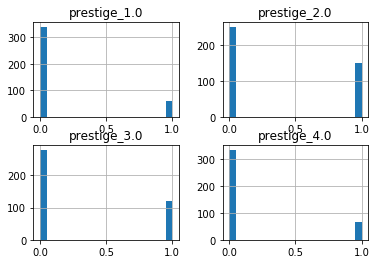

In [44]:
prestige_dummies.hist(bins= 20)

In [31]:
admissions_data.var()

admit               0.217237
gre             13369.953040
gpa                 0.144879
prestige            0.893654
prestige_1.0        0.129568
prestige_2.0        0.234962
prestige_3.0        0.211523
prestige_4.0        0.139793
dtype: float64

In [32]:
statistic, pvalue = stats.ttest_ind(admissions_data["prestige_1.0"], admissions_data["prestige_2.0"], equal_var=False)
print pvalue

4.57870093984e-13


In [33]:
statistic, pvalue = stats.ttest_ind(admissions_data["prestige_3.0"], admissions_data["prestige_4.0"], equal_var=False)
print pvalue

6.08533866159e-06


In [42]:
grades = smf.ols(formula='admit ~ gpa + gre + prestige', data=admissions_data).fit()


In [43]:
grades.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Sat, 17 Jun 2017   Prob (F-statistic):           1.65e-08
Time:                        12:06:50   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2. What is the outcome?

Admission into the school

#### 3. What are the predictors/covariates? 

Answer: gre, gpa, prestige 1,2,3,4

#### 4. What timeframe is this data relevent for?

Answer: the current year graduates scores

#### 4. What is the hypothesis?

Answer: Which of the following, gre, gpa, prestige 1,2,3 or 4 is closely associated to getting admitted into the school.

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: Tohelp me get a better understanding of
my dataset.

#### 2a. What are the assumptions of the distribution of data? 

Answer: Normal distribution

#### 2b. How will determine the distribution of your data? 

Answer: By testing the dataset using skewness and kurtosis, i will be able to understand whether it is normally distributed. If the skew and kurt is closer to zero, it probably means that the data is normally distributed.

#### 3a. How might outliers impact your analysis? 

Answer: Outliers causes associations to be influenced by another confounding factor. It hides the true association between causes and outcomes.

#### 3b. How will you test for outliers? 

Answer: We make use of the Directed Acyclic Graph (DAG). It will help to visually demonstrate the logic of my models. From the (DAG), i will then be able to find out if there are other factors associated or affecting my depending variable. 

#### 4a. What is colinearity? 

Answer:  it means that two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy.

#### 4b. How will you test for colinearity? 

Answer: Using the one of the three test. Firstly, anova test which assumes normal distributions and equal variances in the two data sets. Secondly, The Welch t-test which assumes normal distributions but not necessarily equal variances, and accounts for small sample sizes better and lastly, the Mann-Whitney test which assumes nothing about the distributions but requires at least 20 data points in each set, and produces a weaker p-value.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: Firstly, i will make use of the NumPy and Pandas libraries to analyze datasets using basic
summary statistic figures like for example: mean, median, mode, max, min, quartile, interquartile
range, variance, standard deviation, and correlation. Once that is done, i will proceed to create line graphs, box plots, and histograms, this is to discern characteristics and trends in my dataset. This step is considered as parsing the data. Moving on, i will have to figure out the distribution of my dataset, this can be done by using the skewness and kurtosis test. Once that is done, i will have to craft out a Directed Acyclic Graph to help me determine which variables are most important for my model. The (DAG) will also allow me to identify other factors that have association or impact on my depending variable which are also called outliers. 

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model